In [1]:
from pathlib import Path

import pandas as pd
from pybiomart import Server
from src.data.preprocess import query_paralogs

In [2]:
server = Server(host="http://www.ensembl.org")
dataset = server.marts["ENSEMBL_MART_ENSEMBL"].datasets["scerevisiae_gene_ensembl"]

In [3]:
dataset.list_attributes()

,name,display_name,description
0,ensembl_gene_id,Gene stable ID,Stable ID of the Gene
1,ensembl_transcript_id,Transcript stable ID,Stable ID of the Transcript
2,ensembl_peptide_id,Protein stable ID,
3,ensembl_exon_id,Exon stable ID,
4,description,Gene description,
...,...,...,...
2710,sequence_genomic_coding_end,Genomic coding end,
2711,sequence_constitutive,,
2712,cds_length,CDS Length,
2713,cds_start,CDS start,


In [4]:
dataset.list_filters()

,name,type,description
0,link_so_mini_closure,list,
1,link_go_closure,text,
2,link_ensembl_transcript_stable_id,text,
3,gene_id,text,
4,transcript_id,text,
5,link_ensembl_gene_id,text,
6,chromosome_name,text,
7,start,text,
8,end,text,
9,strand,text,


In [5]:
summary = pd.read_csv(
    Path("../data/summary.csv"), usecols=["gene", "chromosome", "strand"]
)
summary

genes = summary["gene"].tolist()
paralogs = query_paralogs(genes)
paralogs = paralogs.dropna(subset=["paralog_ensembl_id"])
paralogs

Querying BioMart for paralogs of 6705 genes...


,gene,paralog_ensembl_id,strand,paralog_chromosome,orthology_type,percent_identity,percent_identity_r1
3,YOR185C,YLR293C,-1,XII,within_species_paralog,97.27270,97.71690
4,YLL032C,YJL080C,-1,X,other_paralog,7.39394,4.99182
6,YEL041W,YJR049C,1,X,within_species_paralog,50.70710,47.35850
7,YOR237W,YPL145C,1,XVI,within_species_paralog,69.58530,69.58530
8,YOR237W,YKR003W,1,XI,other_paralog,20.96770,20.31250
...,...,...,...,...,...,...,...
15281,YDL245C,YJR160C,-1,X,other_paralog,15.34390,14.45180
15282,YDL245C,YBR298C,-1,II,other_paralog,14.63840,13.51790
15283,YDL245C,YGR289C,-1,VII,other_paralog,15.52030,14.28570
15284,YDL245C,YDL247W,-1,IV,other_paralog,15.16750,14.12150


In [ ]:
# this will take a while
functionals = query_paralogs(
    genes, attrs=["go_id", "interpro", "pfam", "ensembl_gene_id"]
)
functionals

Querying BioMart for paralogs of 6705 genes...


,go_id,interpro,pfam,gene
0,GO:0005737,NaN,NaN,YPL071C
1,GO:0003674,NaN,NaN,YPL071C
2,GO:0008150,NaN,NaN,YPL071C
3,GO:0005634,NaN,NaN,YPL071C
4,GO:0015629,IPR002108,PF00241,YLL050C
...,...,...,...,...
692826,GO:0016021,IPR036249,PF02630,YBR024W
692827,GO:0031966,IPR036249,PF02630,YBR024W
692828,GO:0033617,IPR036249,PF02630,YBR024W
692829,GO:0006878,IPR036249,PF02630,YBR024W


<Axes: title={'center': 'Paralog Orthology Types'}, xlabel='Orthology Type', ylabel='Count'>

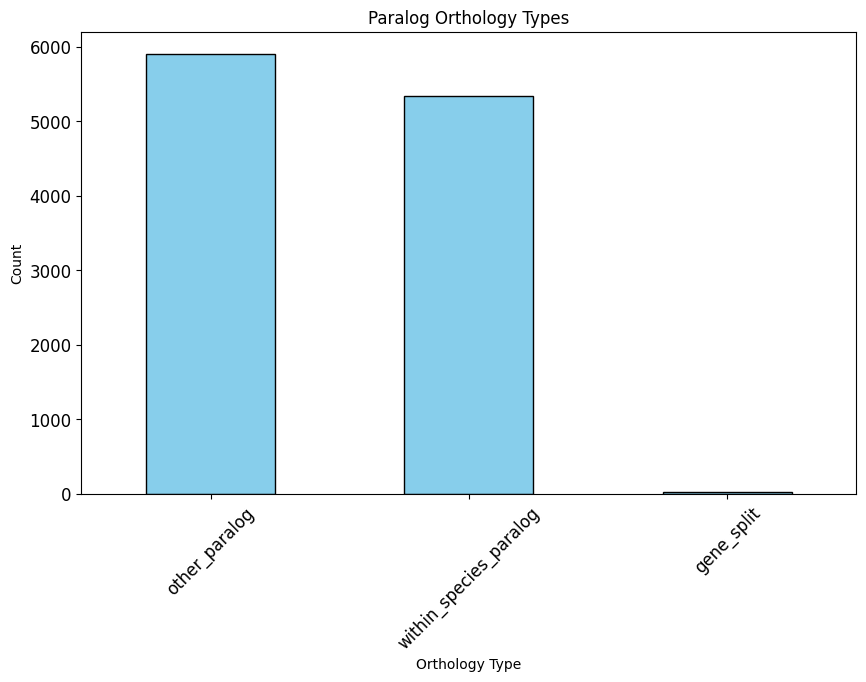

In [6]:
paralogs["orthology_type"].value_counts().plot.bar(
    title="Paralog Orthology Types",
    xlabel="Orthology Type",
    ylabel="Count",
    figsize=(10, 6),
    color="skyblue",
    edgecolor="black",
    rot=45,
    fontsize=12,
    legend=False,
)

<Axes: title={'center': 'Distribution of Percent Identity'}, xlabel='Percent Identity', ylabel='Frequency'>

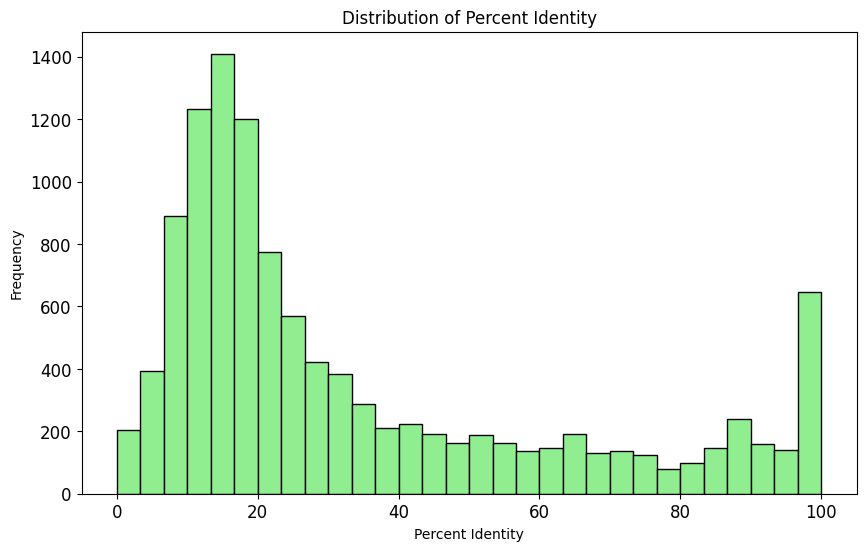

In [7]:
paralogs["percent_identity"].plot.hist(
    title="Distribution of Percent Identity",
    xlabel="Percent Identity",
    ylabel="Frequency",
    bins=30,
    color="lightgreen",
    edgecolor="black",
    figsize=(10, 6),
    fontsize=12,
    legend=False,
)